In [2]:
import networkx as nx

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open('data.txt', 'r') as f:
    data = f.read()

data = data.replace('\n', ' ')
unique_words = list(set(data.split(' ')))
    
data = data.lower().split('.')
data = list(map(str.strip, data))
data = list(map(lambda x: x.split(' '), data))

data = np.array(data)

In [4]:
len(unique_words)

133

In [5]:
graph_data = {}

for sentence in data:
    for word_1 in sentence:
        for word_2 in sentence:
            if word_1 not in graph_data:
                graph_data[word_1] = {}
            if sentence.index(word_1) == sentence.index(word_2) - 1:
                if word_2 not in graph_data[word_1]:
                    graph_data[word_1][word_2] = 0
                else:
                    graph_data[word_1][word_2] += 1

In [6]:
graph_data

{'video': {'provides': 6, 'that': 6},
 'provides': {'a': 6, 'header,': 6},
 'a': {'powerful': 6,
  'keyword': 6,
  'matching': 6,
  'new': 13,
  'picture': 11,
  'table,': 17},
 'powerful': {'way': 6},
 'way': {'to': 6, 'a': 11},
 'to': {'help': 6,
  'add': 12,
  'search': 6,
  'make': 6,
  'match': 13,
  'change': 11,
  'stop': 5},
 'help': {'you': 6, 'keep': 6},
 'you': {'prove': 6,
  'click': 27,
  'can': 25,
  'want': 6,
  'apply': 6,
  'need': 24,
  'work': 11},
 'prove': {'your': 6},
 'your': {'point': 6, 'document': 20, 'headings': 6, 'document,': 5},
 'point': {},
 'when': {'you': 46},
 'click': {'online': 6, 'insert': 6, 'design': 6, 'it': 11, 'where': 11},
 'online': {'video,': 6, 'for': 6},
 'video,': {},
 'can': {'paste': 6, 'also': 6, 'add': 6, 'collapse': 5},
 'paste': {'in': 6},
 'in': {'the': 19, 'word': 6, 'your': 5},
 'the': {'embed': 13,
  'video': 6,
  'elements': 13,
  'pictures,': 6,
  'new': 12,
  'way': 5,
  'plus': 5,
  'document': 11,
  'end,': 5},
 'embed': {

In [7]:
df = pd.DataFrame(graph_data)

In [8]:
G = nx.MultiDiGraph()

weights = []
for word_1 in graph_data:
    for word_2 in graph_data[word_1]:
        G.add_edge(word_1, word_2, weight=graph_data[word_1][word_2])
#         weights.append((word_1, word_2, graph_data[word_1][word_2]))

# G.add_weighted_edges_from(weights)

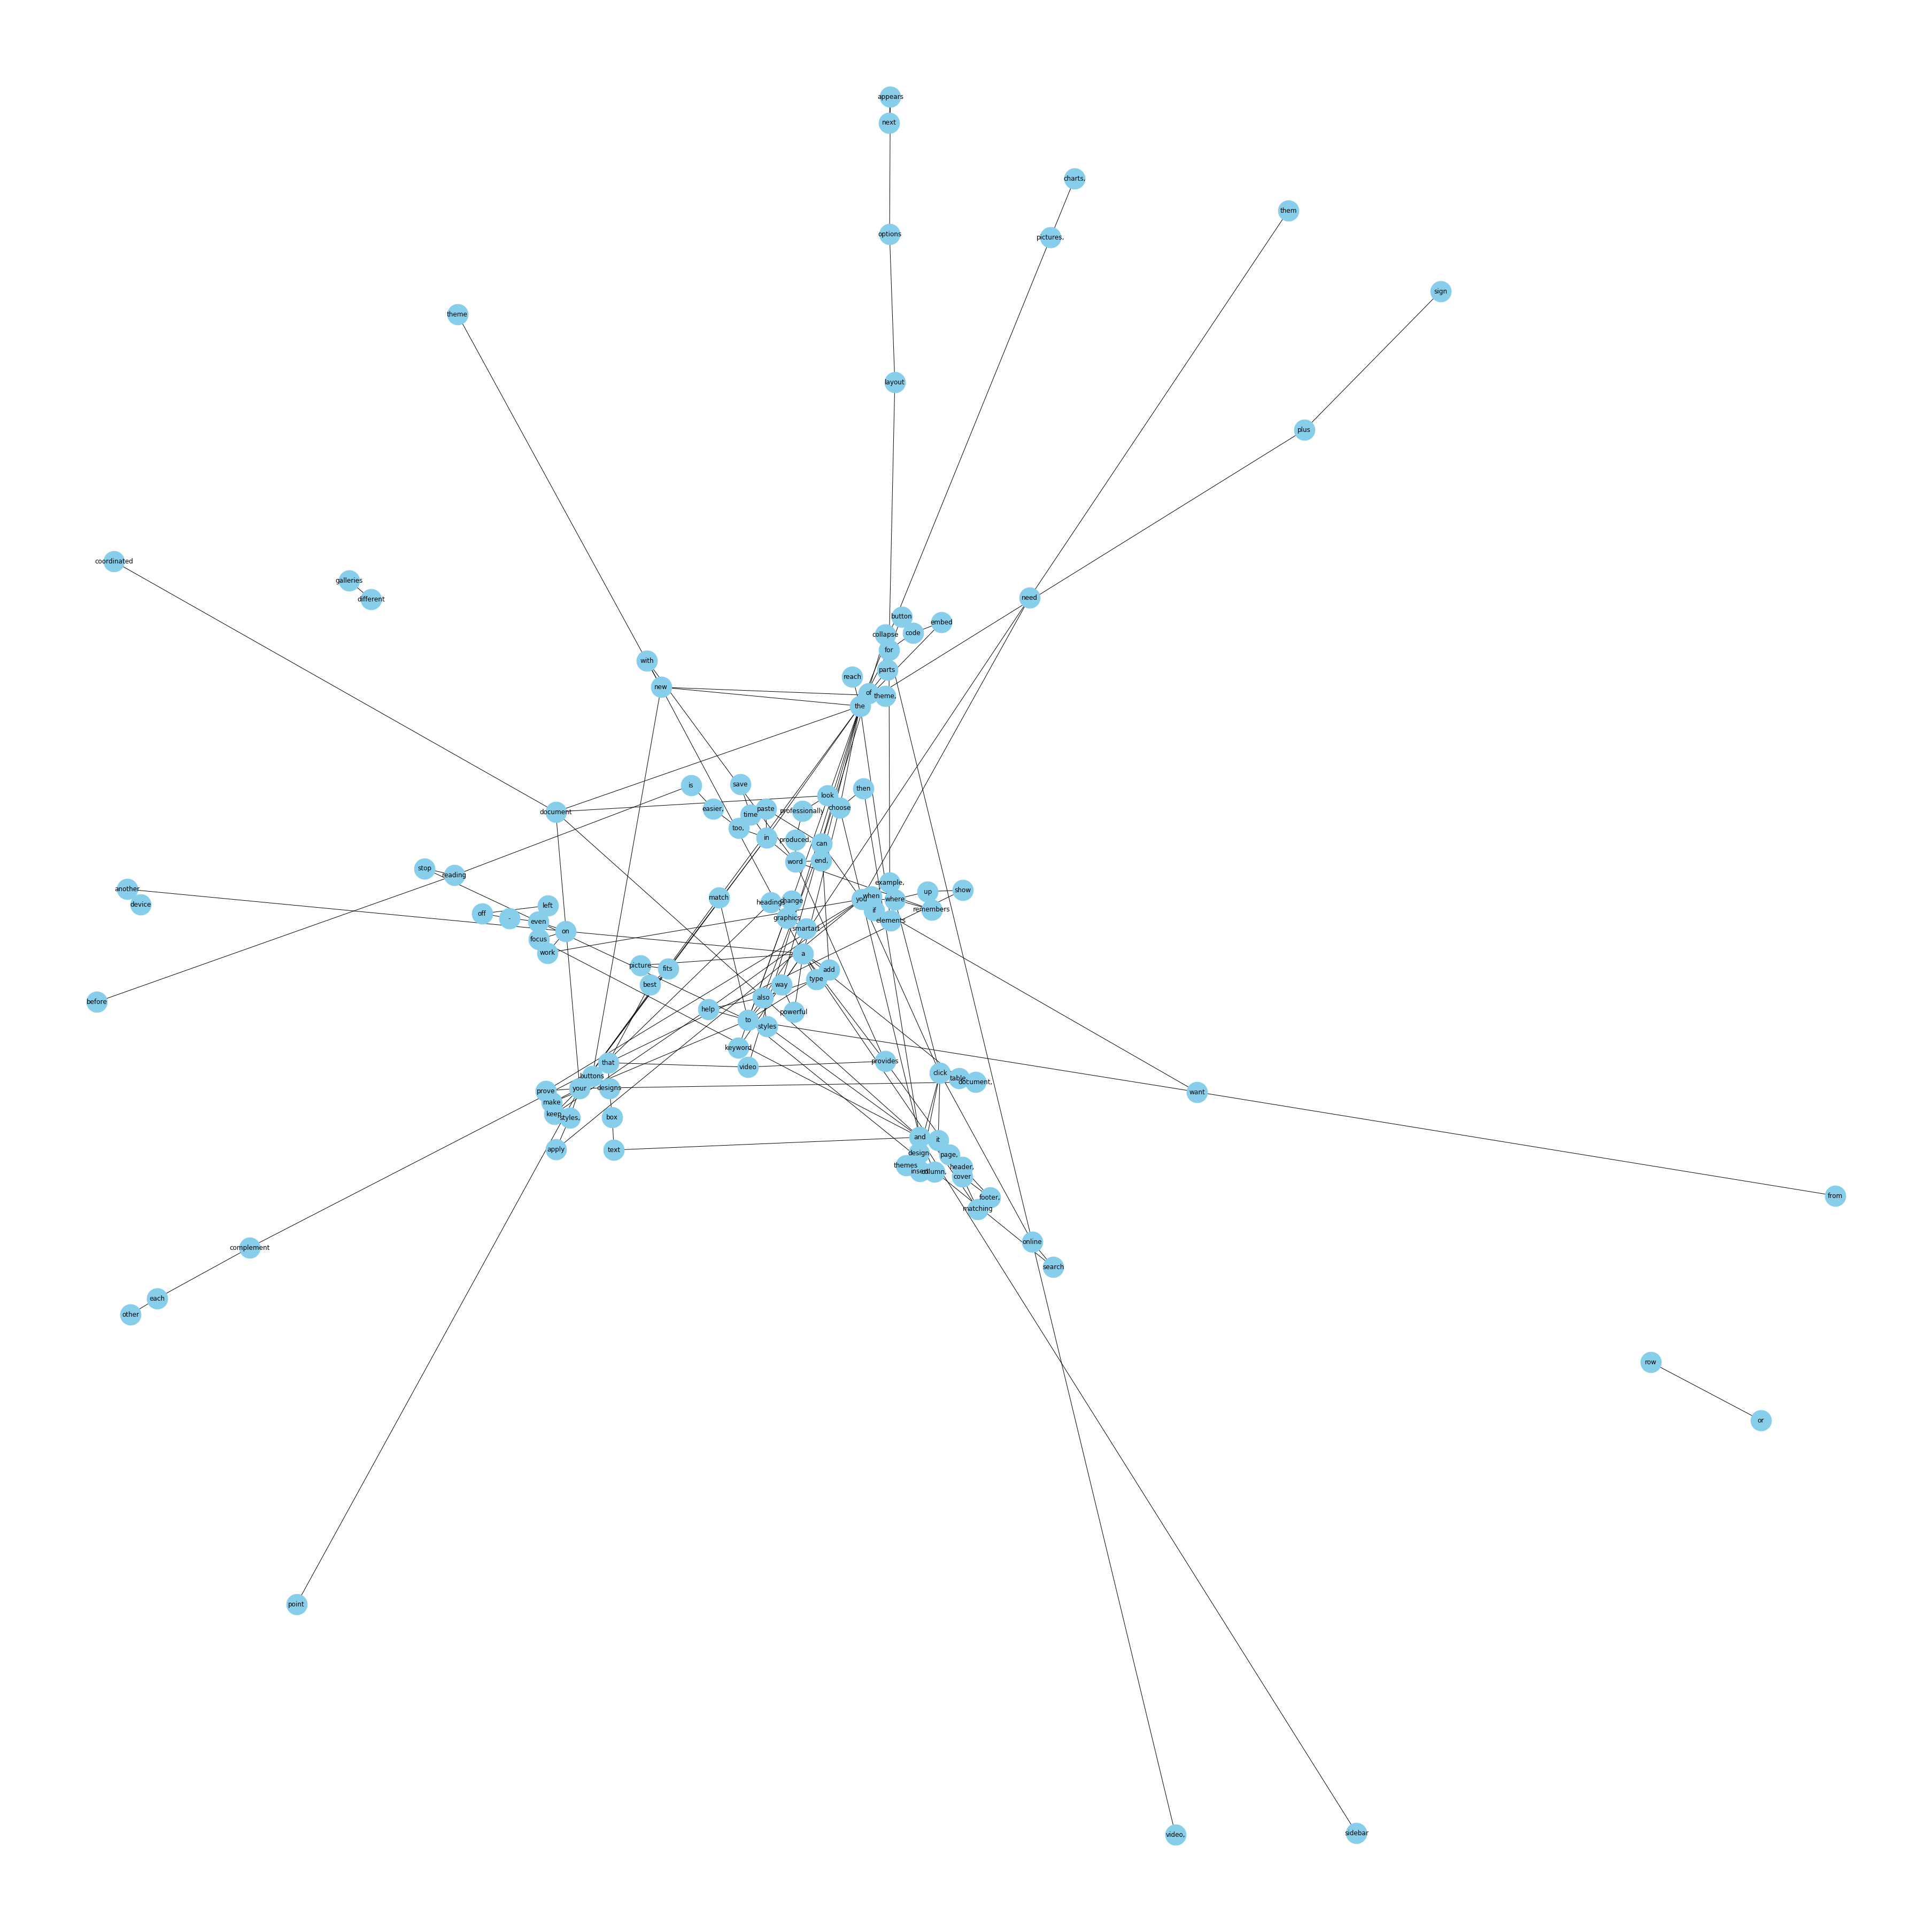

In [11]:
plt.figure(figsize=(50, 50))

nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, arrows=False, edge_cmap=plt.cm.Blues)
plt.savefig('undirected.png')

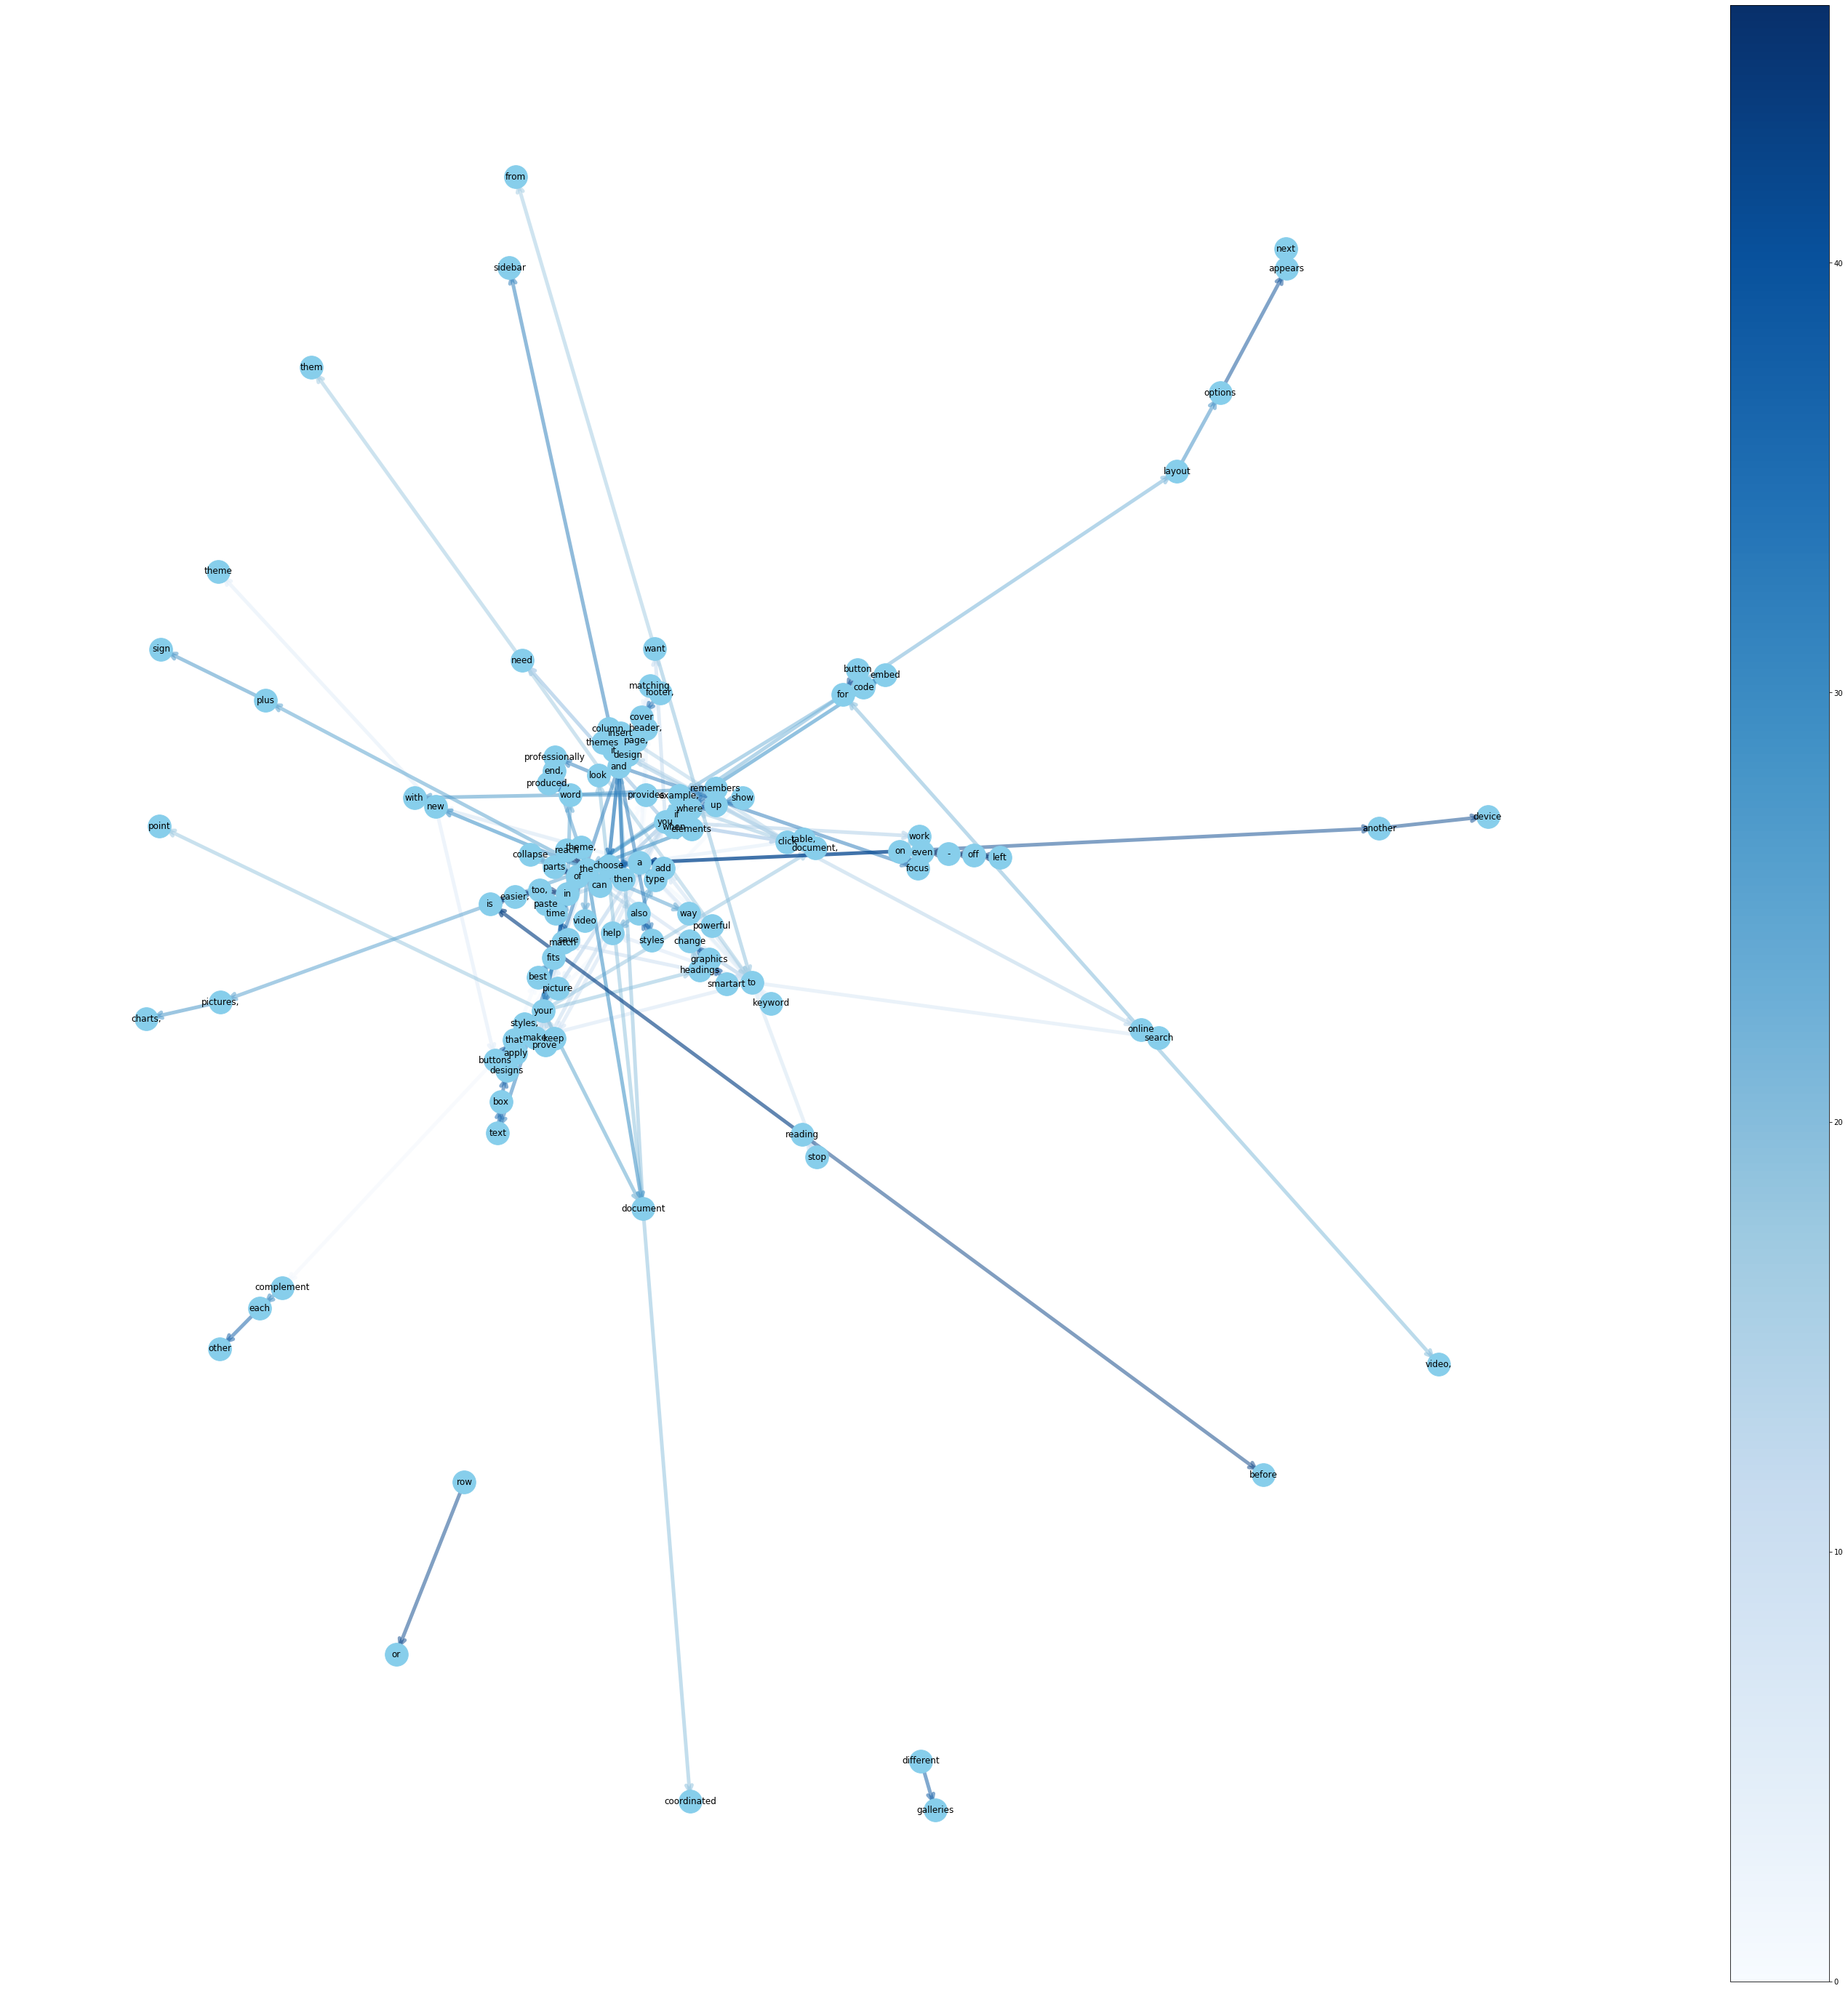

In [114]:
import matplotlib as mpl

plt.figure(figsize=(50, 50))

pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
# edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]
edge_alphas = edgewidth/np.max(edgewidth) + 0.4
edge_alphas = np.clip(edge_alphas, 0, 1)

nx.draw_networkx_labels(G, pos)
nodes = nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue', with_labels=True)
edges = nx.draw_networkx_edges(G, pos, arrowstyle='->',
                               arrowsize=20, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=5)

# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
pc.set_clim(0, np.max(edgewidth))
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.savefig('directed.png')